<a href="https://colab.research.google.com/github/mbkbala/User_Behaviour_-_Analysis_bala_.ipynb/blob/main/User_Behaviour_%26_Analysis_bala_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sb
import numpy as np

In [10]:
df = pd.read_csv("/content/sample_data/User Behavior Analysis.csv")

In [11]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [12]:
df.drop(['course_id'],axis=1,inplace = True)

In [13]:
df.price.value_counts()[:10]

,count
price,
20,830
50,468
0,310
200,295
40,217
30,166
25,154
95,152
100,133


<Axes: ylabel='is_paid'>

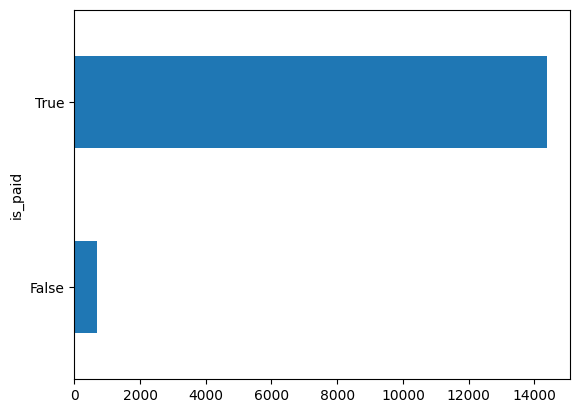

In [14]:
df.groupby(['is_paid'])['content_duration'].sum().plot(kind="barh")

<Axes: xlabel='price'>

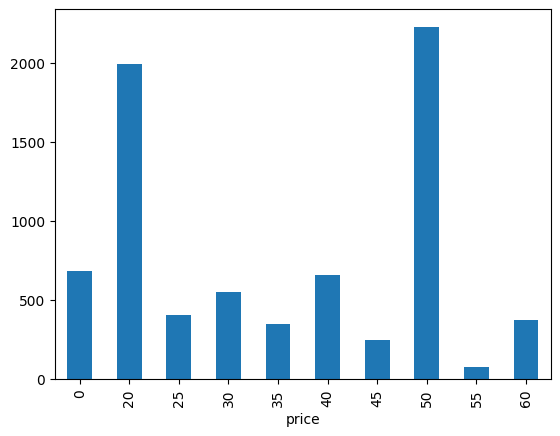

In [15]:
df.groupby(['price'])['content_duration'].sum()[:10].plot(kind="bar")

(-1.0999971788812313,
 1.1000022812173573,
 -1.0999994846395618,
 1.0999999754590268)

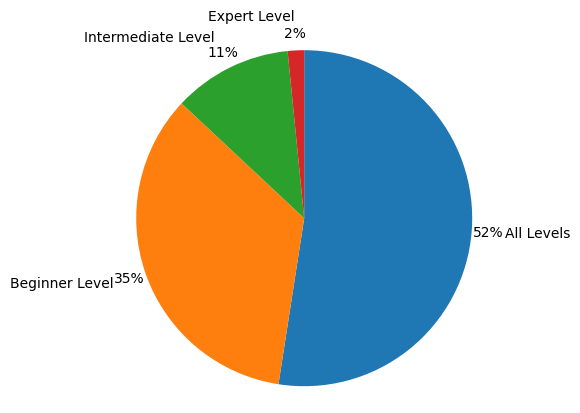

In [16]:
import matplotlib. pyplot as plt

sorted_counts = df['level'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);
plt.axis('square')

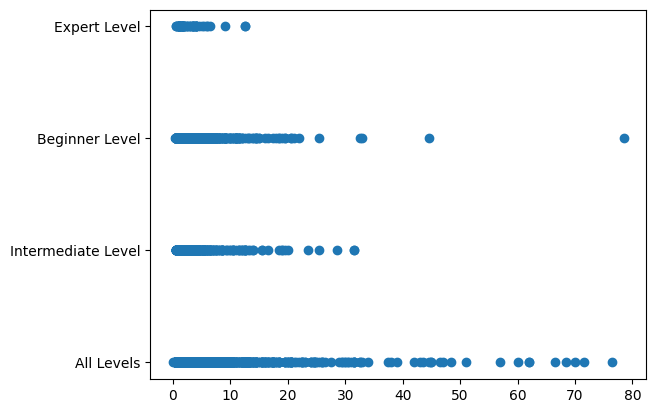

In [17]:
plt.scatter(data = df, x = 'content_duration', y = 'level')

<Axes: xlabel='num_subscribers', ylabel='num_reviews'>

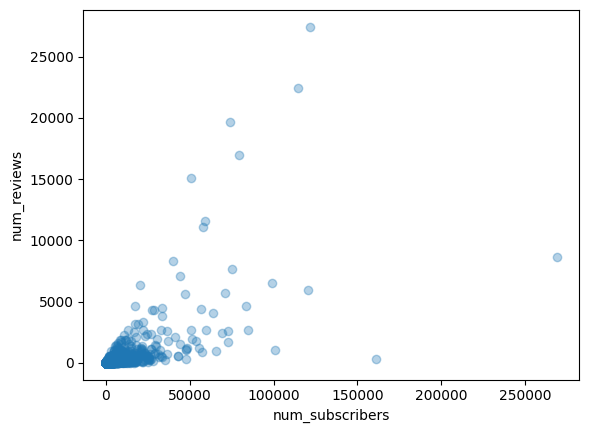

In [18]:
sb.regplot(data = df, x = 'num_subscribers', y = 'num_reviews', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

In [19]:
df['year'] = pd.DatetimeIndex(df['published_timestamp']).year

<ipython-input-20-8a0d317db240>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['year'])


<Axes: xlabel='year', ylabel='Density'>

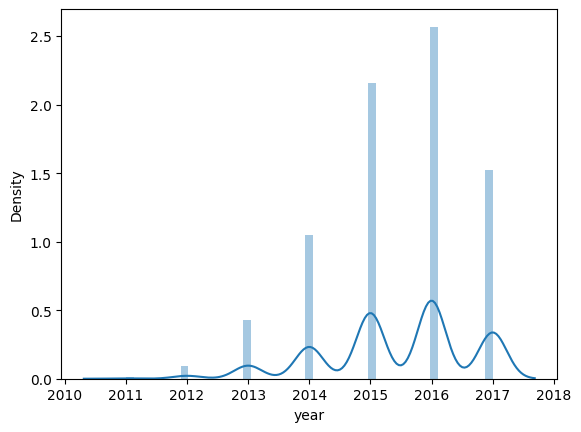

In [20]:
sb.distplot(df['year'])

<Axes: xlabel='year', ylabel='num_subscribers'>

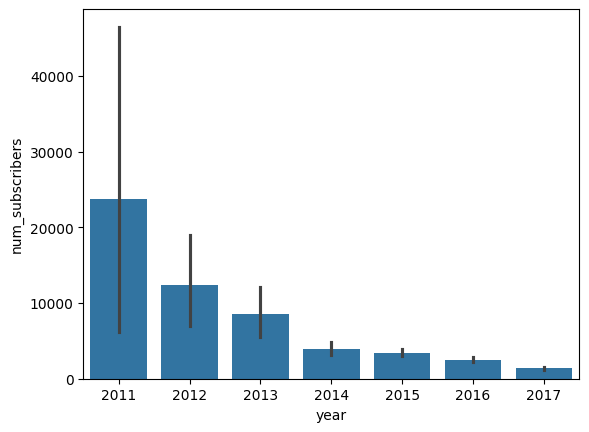

In [21]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'year', y = 'num_subscribers', color = base_color)

In [22]:
df.subject.value_counts()

,count
subject,
Web Development,1200
Business Finance,1195
Musical Instruments,680
Graphic Design,603


<Axes: xlabel='count', ylabel='subject'>

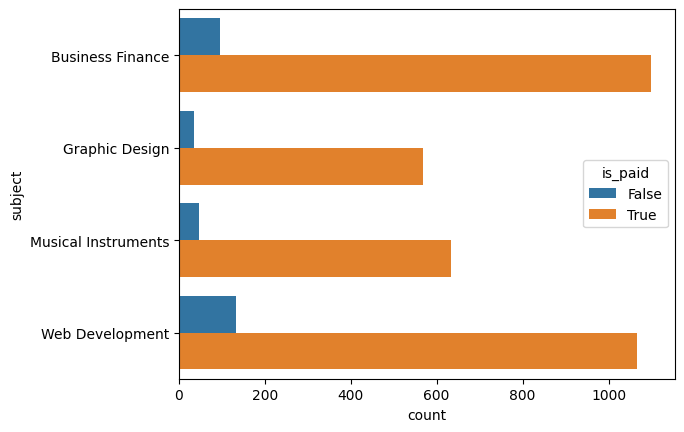

In [23]:
sb.countplot(data = df, y = 'subject', hue = 'is_paid')

<Axes: xlabel='year', ylabel='subject'>

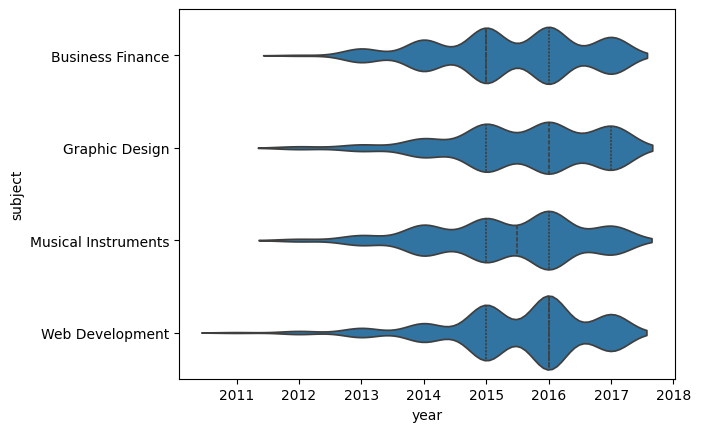

In [24]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, y = 'subject', x = 'year', color = base_color,
              inner = 'quartile')